In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import pie_plot
import numpy as np


In [3]:
data = pd.read_csv('../../data/processed/fraud_viz_df.csv') 

I use exponential increasing bins since the range of my data is high. Further analysis can give some insights using uniform bins

In [4]:
bins = [0, 1000, 10000, 100000, 1000000, 10000000, 100000000]
labels = ['0-1.000', '1.000-10.000', '10.000-100.000', '100.000-1.000.000', '1.000.000-10.000.000', '10.000.000-100.000.000']
data['amount_range'] = pd.cut(data['amount'], bins=bins, labels=labels, right=False)

### Distribution of the new variable amount_range

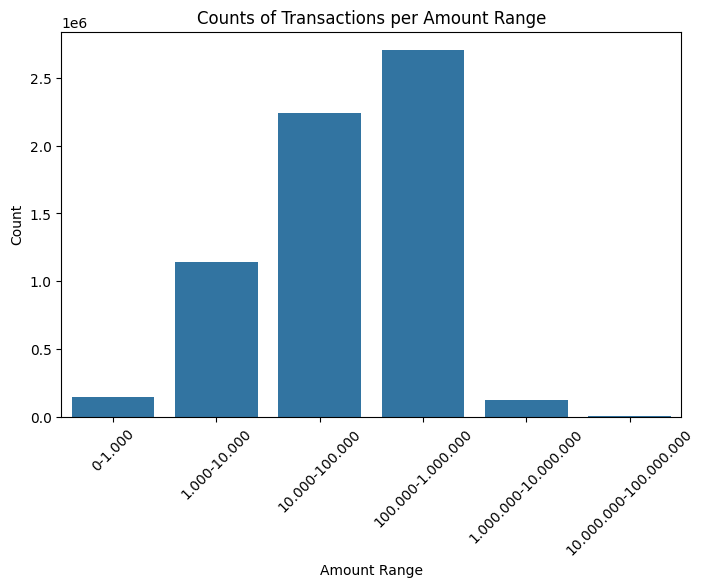

In [5]:
order = ['0-1.000', '1.000-10.000', '10.000-100.000', '100.000-1.000.000', '1.000.000-10.000.000', '10.000.000-100.000.000']


plt.figure(figsize=(8, 5))
barplot = sns.countplot(data=data, x='amount_range', order=order)

plt.title('Counts of Transactions per Amount Range')
plt.xlabel('Amount Range')
plt.ylabel('Count')

plt.xticks(rotation=45)  
plt.show()

In [6]:
count_data = data.groupby(['amount_range', 'isFraud'], observed=True).size().reset_index(name='count')
total_transactions = count_data.groupby('amount_range', observed = True)['count'].sum().reset_index(name='total')
desc_amount = count_data.merge(total_transactions, on='amount_range')
desc_amount['rate (%)'] = (desc_amount['count'] / desc_amount['total'])*100
desc_amount.query('isFraud == 1') 

,amount_range,isFraud,count,total,rate (%)
1,0-1.000,1,58,142642,0.040661
3,1.000-10.000,1,220,1143361,0.019242
5,10.000-100.000,1,1429,2239253,0.063816
7,100.000-1.000.000,1,3800,2706738,0.140390
9,1.000.000-10.000.000,1,2419,124976,1.935572
11,10.000.000-100.000.000,1,287,5650,5.079646


Observations: 

The biggest ranges have a higher fraud_rate
- 100.000-1.000.000 = 0.14 % (most transactions are inside this amount range)
- 1.000.000-10.000.000 = 1.93 % (very scarce type of amount range)
- 10.000.000-100.000.000 = 5.07% (the less common and largest of all amount ranges)

Fraud is more likely to happen when huge amounts of money are transferred.